In [4]:
# Important libraries

import numpy as np
import subprocess
import time

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [9]:
# compile the C program with gcc

subprocess.run(["gcc", "-o", "Problem_3", "Problem_3.c", "-fopenmp"])

CompletedProcess(args=['gcc', '-o', 'Problem_3', 'Problem_3.c', '-fopenmp'], returncode=0)

In [10]:
# Functions

def least_squares_regression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    a = ((x - mean_x)*(y - mean_y)).sum()/((x - mean_x)**2).sum()
    b = mean_y - a * mean_x
    return a,b

In [13]:
# Simulation

NMC = 6#100
Ns = np.array([200, 400, 600, 800, 1000])
Ps = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.56, 
               0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 
               0.63, 0.64, 0.65, 0.7, 0.8])

start = time.time()
Iav = [[] for _ in range(len(Ns))]
Iav_ = [[] for _ in range(len(Ns))]
Pmax = [[] for _ in range(len(Ns))]

for i,N in enumerate(Ns):
    print('N =', N)

    for p in Ps:
        if p != Ps[0]: print(f', {p:.2f}', end="")
        else: print(f'p = {Ps[0]:.2f}', end="")

        result = subprocess.run(["./Problem_3"], input=f"{NMC}\n{N}\n{p}", text=True, stdout=subprocess.PIPE)
        Iav[i].append(float(result.stdout.split('\n')[0]))
        Iav_[i].append(float(result.stdout.split('\n')[1]))
        Pmax[i].append(float(result.stdout.split('\n')[2]))  
    print('\n')
          
print('time =', time.time()-start, "sec")

N = 200
p = 0.10, 0.20, 0.30, 0.40, 0.50, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.70, 0.80, 0.90, 0.99

N = 400
p = 0.10, 0.20, 0.30, 0.40, 0.50, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.70, 0.80, 0.90, 0.99

N = 600
p = 0.10, 0.20, 0.30, 0.40, 0.50, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.70, 0.80, 0.90, 0.99

N = 800
p = 0.10, 0.20, 0.30, 0.40, 0.50, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.70, 0.80, 0.90, 0.99

N = 1000
p = 0.10, 0.20, 0.30, 0.40, 0.50, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.70, 0.80, 0.90, 0.99

time = 170.26495099067688 sec


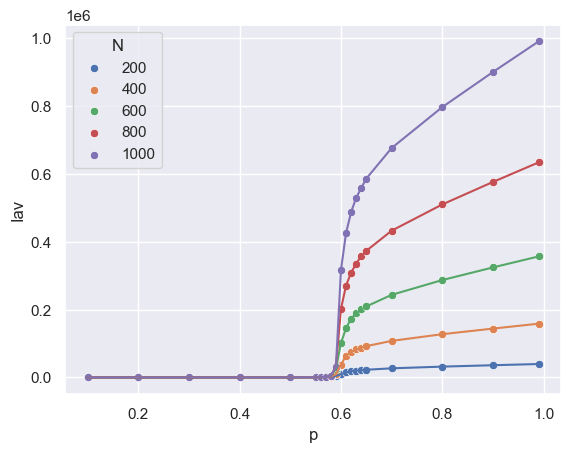

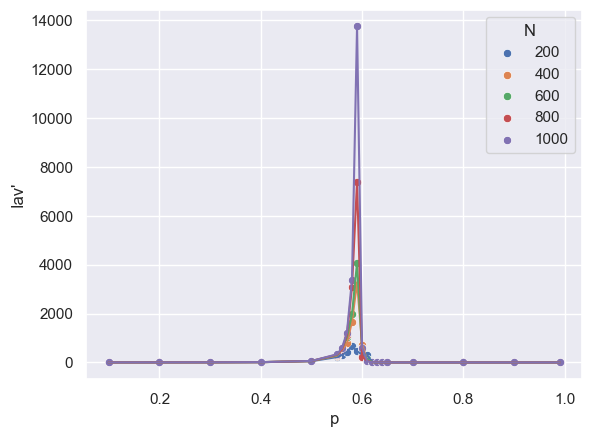

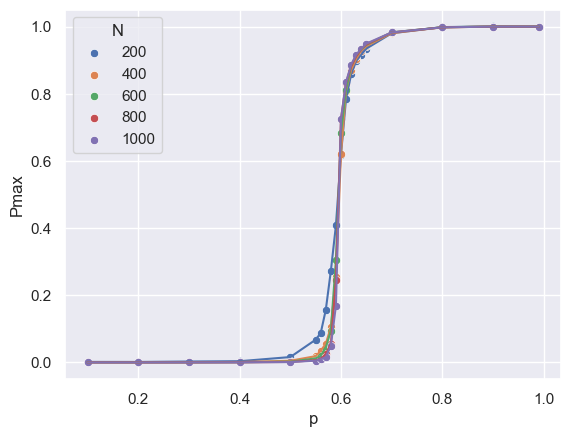

In [14]:
# Visualization I

for y,y_label in zip([Iav, Iav_, Pmax], ["Iav", "Iav'", "Pmax"]):
    for i in range(len(Ns)):
        sns.scatterplot(x=Ps,y=y[i], label=Ns[i])
        sns.lineplot(x=Ps,y=y[i])
    plt.xlabel('p')
    plt.ylabel(y_label)
    plt.legend(title='N')
    plt.show()

N = 200 | y = -2.073*x - 0.990
N = 400 | y = -2.103*x - 1.023
N = 600 | y = -2.128*x - 1.051
N = 800 | y = -2.124*x - 1.045
N = 1000 | y = -2.131*x - 1.051


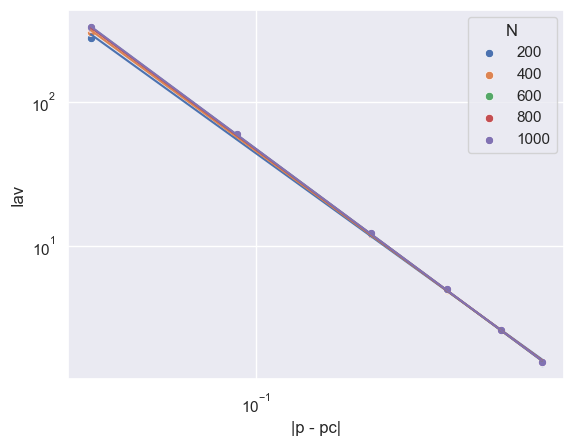


N = 200 | y = 0.215*x + 0.533
N = 400 | y = 0.183*x + 0.452
N = 600 | y = 0.149*x + 0.358
N = 800 | y = 0.145*x + 0.350
N = 1000 | y = 0.137*x + 0.328


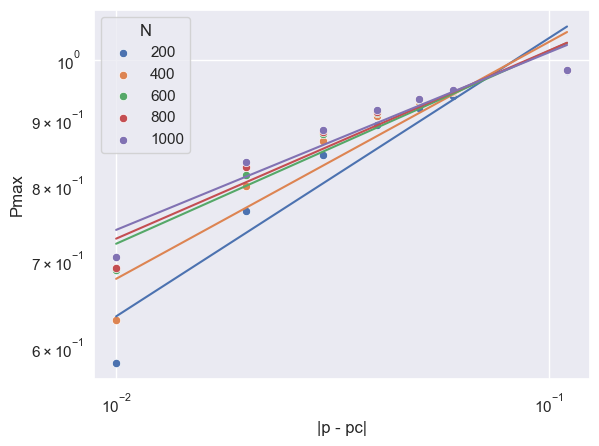


N = 200 | y = -3.553*x - 9.278
N = 400 | y = -3.876*x - 10.689
N = 600 | y = -3.802*x - 10.571
N = 800 | y = -3.960*x - 11.433
N = 1000 | y = -3.925*x - 11.411


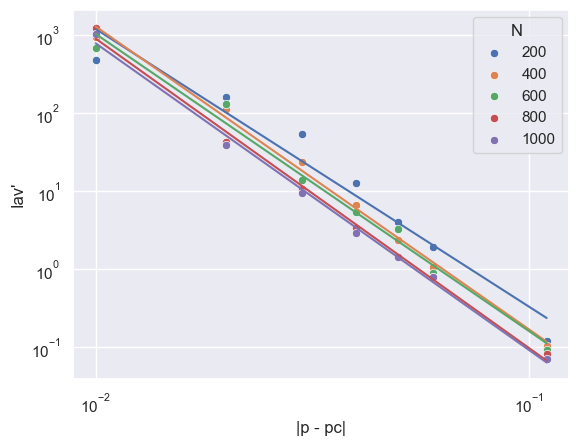

In [6]:
# Visualization II

for y,y_label in zip([Iav, Pmax, Iav_], ["Iav", "Pmax", "Iav'"]):
    for i in range(len(Ns)):
        pc_idx = np.argmax(Iav_[i])
        pc = Ps[pc_idx]

        if y_label == "Iav":
            x_ = abs(Ps[:pc_idx-3] -pc)
            y_ = Iav[i][:pc_idx-3]
        else:
            x_ = abs(Ps[pc_idx+1:-1] -pc)
            y_ = y[i][pc_idx+1:-1]

        a,b = least_squares_regression(x=np.log(x_), y=np.log(y_))
        print(f'N = {Ns[i]} | y = {a:.3f}*x {"+" if (b > 0) else "-"} {abs(b):.3f}')

        sns.lineplot(x=x_, y=np.exp(b)*x_**a)
        sns.scatterplot(x=x_, y=y_, label=Ns[i])
    plt.xlabel('|p - pc|')
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title='N')
    plt.show()
    print()